# **Project Name**    -**Yulu Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Overview:

This project aims to develop a predictive machine learning regression model to assist Yulu in forecasting hourly bike rental demand. By analyzing various natural and external influencing factors, the model provides accurate predictions to support strategic decision-making.

Here,
* Know your data - Loaded the dataset and gained an initial overview of its structure and contents.

* Understatnding your variables - Evaluated each variable to understand its significance and the type of information it holds.

* Data Wrangling - Performed data aggregations and extracted valuable insights from individual variables.

* Data Visualization - Categorized visualization techniques into three groups:

1)Univariate Analysis : Examined single-variable distributions.

2)Bivariate Analysis : Explored relationships between two variables.

3) Multivariate Analysis : Analyzed interactions among multiple variables for deeper insights.

* Feature Engineering & Data Preprocessing - Cleaned and prepared the dataset for model implementation by handling missing values, encoding categorical variables, normalizing numerical features and so on.

* Machine Learning Model Implementation - Developed three regression models and trained them using the preprocessed dataset. Implemented cross-validation techniques to enhance model performance.

* Future Work - Selected the best-performing model and saved it as a joblib file, ensuring it can be utilized for future applications.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


* Optimize Fleet Management:

Predicting demand based on factors like temperature, humidity, and time of day allows Yulu Bike to deploy bikes more strategically, ensuring availability during peak times and reducing idle resources.

* Enhance Customer Experience:

By understanding how external factors such as weather and holidays affect demand, Yulu Bike can better align their service offerings with customer needs, improving overall user satisfaction.

* Improve Operational Efficiency:

Accurate demand forecasts help in planning maintenance schedules and managing bike distribution across different areas, leading to more efficient operations.

* Adapt to Environmental Factors:

Insights into how weather conditions and seasonal variations impact bike usage enable Yulu Bike to adjust their strategies in real-time, ensuring optimal service delivery throughout the year.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load dataset
# Load Dataset
Bike_df = pd.read_csv("/content/drive/MyDrive/Data Sets/SeoulBikeData.csv",encoding='latin1')

### Dataset First View

In [4]:
# Dataset First Look
first_view=pd.concat([Bike_df.head(),Bike_df.tail()])
first_view

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
# Dataset shape
Bike_df.shape


(8760, 14)

### Dataset Information

In [6]:
# Dataset Info
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(Bike_df.duplicated().sum())

0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
Bike_df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


### What did you know about your dataset?

* We have 8760 rows and 14 columns in the dataset.
* Out of those 14 columns we have 3 categorical, rest are continuous.
* Dataset doesn't contains any duplicate or null values.
* Except "Date" all variables are in correct datatype.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
Bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe
Bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

Date - Date of the reading

Rented Bike Count - Number of bikes rented in that particular hour

Hour - Hour which the data is noted

Temperature(°C) - Temperature measured in celcius

Humidity(%) - Relative humitiy measured

Wind speed (m/s) - Speed of wind at meater per second value

Solar Radiation (MJ/m2) - Solar radiation reading measured in Megajoules per square meter

Rainfall(mm) - Rainfall measure in milli meter

Snowfall (cm) - Snowfall in centimeter measure

Seasons - Season( Spring, Summer, Fall, Winter) => Categorical

Holiday - It denotes whether the day is holiday or not => Categorical

Functioning Day - Whether the day is functional or not => Categorical

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for column in (Bike_df.columns):
  print(f'No. of unique values in {column} is {Bike_df[column].nunique()}')

No. of unique values in Date is 365
No. of unique values in Rented Bike Count is 2166
No. of unique values in Hour is 24
No. of unique values in Temperature(°C) is 546
No. of unique values in Humidity(%) is 90
No. of unique values in Wind speed (m/s) is 65
No. of unique values in Visibility (10m) is 1789
No. of unique values in Dew point temperature(°C) is 556
No. of unique values in Solar Radiation (MJ/m2) is 345
No. of unique values in Rainfall(mm) is 61
No. of unique values in Snowfall (cm) is 51
No. of unique values in Seasons is 4
No. of unique values in Holiday is 2
No. of unique values in Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

#### Effects of Categorical variables

In [12]:
# Average rented bike count on every season and holidays
season_and_holiday_wise_rented_count = Bike_df.groupby(['Seasons', 'Holiday'])['Rented Bike Count'].mean().sort_values(ascending = False).reset_index() # groupby code

season_and_holiday_wise_rented_count['Rented Bike Count'] = season_and_holiday_wise_rented_count['Rented Bike Count'].astype(int)

print(season_and_holiday_wise_rented_count)

  Seasons     Holiday  Rented Bike Count
0  Summer  No Holiday               1034
1  Summer     Holiday               1022
2  Autumn  No Holiday                823
3  Autumn     Holiday                758
4  Spring  No Holiday                733
5  Spring     Holiday                635
6  Winter  No Holiday                232
7  Winter     Holiday                156


#### Hourwise Effect

In [13]:
# Look for how rental count varies between hours
hour_wise_rented_avg = Bike_df.groupby('Hour')['Rented Bike Count'].mean().sort_values(ascending = False).reset_index()

hour_wise_rented_avg['Rented Bike Count'] = hour_wise_rented_avg['Rented Bike Count'].astype(int)

print(hour_wise_rented_avg)

    Hour  Rented Bike Count
0     18               1502
1     19               1195
2     17               1138
3     20               1068
4     21               1031
5      8               1015
6     16                930
7     22                922
8     15                829
9     14                758
10    13                733
11    12                699
12    23                671
13     9                645
14     7                606
15    11                600
16     0                541
17    10                527
18     1                426
19     2                301
20     6                287
21     3                203
22     5                139
23     4                132


#### Due to natural causes

In [14]:
# effects of rain
rain = Bike_df[Bike_df['Rainfall(mm)'] != 0] #  rows with rain
no_rain = Bike_df[Bike_df['Rainfall(mm)'] == 0] #  without rain


print(f"Average number of bikes rented on rainy days : {rain['Rented Bike Count'].mean().astype(int)}\n")

print(f"Average number of bikes rented on non-rainy days : {no_rain['Rented Bike Count'].mean().astype(int)}")

Average number of bikes rented on rainy days : 163

Average number of bikes rented on non-rainy days : 739


In [15]:
# effects of snowfall
snowfall = Bike_df[Bike_df['Snowfall (cm)'] != 0] #  rows with snowfall
no_snowfall = Bike_df[Bike_df['Snowfall (cm)'] == 0] # without snowfall


print(f"Average number of bikes rented on snowfall days : {snowfall['Rented Bike Count'].mean().astype(int)}\n")
print(f"Average number of bikes rented on non-snowfall days : {no_snowfall['Rented Bike Count'].mean().astype(int)}")

Average number of bikes rented on snowfall days : 185

Average number of bikes rented on non-snowfall days : 732


In [16]:
# visibility effect
visibility = Bike_df[Bike_df['Visibility (10m)'] > 1000] # high visibility
Moderate_Visibility = Bike_df[(Bike_df['Visibility (10m)'] > 500) & (Bike_df['Visibility (10m)'] < 1000)] # moderate visibility
no_visibility = Bike_df[Bike_df['Visibility (10m)'] < 500] # low visibility

print(f"Average number of bikes rented on high visibility days : {visibility['Rented Bike Count'].mean().astype(int)}\n")
print(f"Average number of bikes rented on moderate visibility days : {Moderate_Visibility['Rented Bike Count'].mean().astype(int)}\n")
print(f"Average number of bikes rented on low visibility days : {no_visibility['Rented Bike Count'].mean().astype(int)}")


Average number of bikes rented on high visibility days : 774

Average number of bikes rented on moderate visibility days : 646

Average number of bikes rented on low visibility days : 355


In [17]:
# effects on different humidity levels
High_Humidity = Bike_df[Bike_df['Humidity(%)'] > 60] # very high humidity greater than 60%
Low_Humidity = Bike_df[Bike_df['Humidity(%)'] < 30] # Low humidity less than 30%
Moderate_Humidity = Bike_df[(Bike_df['Humidity(%)'] > 30) & (Bike_df['Humidity(%)'] < 60)] # moderate himidity between 30 and 60%

print(f"Average number of bikes rented on high humidity days : {High_Humidity['Rented Bike Count'].mean().astype(int)}\n")
print(f"Average number of bikes rented on low humidity days : {Low_Humidity['Rented Bike Count'].mean().astype(int)}\n")
print(f"Average number of bikes rented on moderate humidity days : {Moderate_Humidity['Rented Bike Count'].mean().astype(int)}")


Average number of bikes rented on high humidity days : 578

Average number of bikes rented on low humidity days : 706

Average number of bikes rented on moderate humidity days : 824


In [18]:
# Temperature effect
Low_Temperature = Bike_df[Bike_df['Temperature(°C)'] < 5] # low temperature less tan 5°C
Moderate_Temperature = Bike_df[(Bike_df['Temperature(°C)'] > 5) & (Bike_df['Temperature(°C)'] < 30)] # moderate temperature between 5 and 30°C
High_Temperature = Bike_df[Bike_df['Temperature(°C)'] > 30] # high temperature greater than 30°C

# outputs
print(f'Average number of bikes rented on low temperature days : {Low_Temperature["Rented Bike Count"].mean().astype(int)}\n')
print(f'Average number of bikes rented on moderate temperature days : {Moderate_Temperature["Rented Bike Count"].mean().astype(int)}\n')
print(f'Average number of bikes rented on high temperature days : {High_Temperature["Rented Bike Count"].mean().astype(int)}')


Average number of bikes rented on low temperature days : 252

Average number of bikes rented on moderate temperature days : 865

Average number of bikes rented on high temperature days : 1106


####Different rental conditions

In [19]:
# no.of rentals in different rental count
no_rental = Bike_df[Bike_df['Rented Bike Count'] == 0] # rows without rental
low_renting = Bike_df[(Bike_df['Rented Bike Count'] < 100) & (Bike_df['Rented Bike Count'] > 0)] # rows with low rental - between 0 and 100
high_renting = Bike_df[(Bike_df['Rented Bike Count'] > 100) & (Bike_df['Rented Bike Count'] < 1000)] # rows with high rental - greater than 100
very_high_renting = Bike_df[Bike_df['Rented Bike Count'] > 1000] # rows with vbery high rental - greater than 1000

# outputs
print(len(no_rental))
print(len(low_renting))
print(len(high_renting))
print(len(very_high_renting))

295
916
5121
2418


In [20]:
# checking whether all no rental hours belongs to non functioning day
no_rental['Functioning Day'].value_counts()

,count
Functioning Day,
No,295


In [21]:
# hour the rentals are low
low_renting['Hour'].value_counts().head(10)

,count
Hour,
4,147
5,147
3,96
6,80
2,58
7,43
1,32
8,29
23,27


In [22]:
# hours with high rentals
high_renting['Hour'].value_counts().head(10)

,count
Hour,
10,311
1,309
2,293
0,283
11,281
6,271
3,254
9,246
12,223


In [23]:
# peak hours
very_high_renting['Hour'].value_counts().head(10)

,count
Hour,
18,217
17,206
19,200
21,190
20,188
22,177
16,163
8,150
15,145


### What all manipulations have you done and insights you found?

Let's see insights with each features

* Seasons: Summer shows the highest rental counts, while winter has the lowest.

* Holiday: Bike rentals tend to be higher on working days compared to holidays.

* Hour: Rental demand peaks in the evenings and mornings, with noticeably lower activity during midnight to early morning hours (11:00 P.M. to 6:00 A.M.).

* Visibility: Higher visibility levels are generally associated with increased bike rentals.

* Humidity: Rentals are elevated during periods of moderate humidity.

* Temperature: Bike rentals typically increase as temperatures rise.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Univariate

#### Chart 1: Distribution of bike count

[]

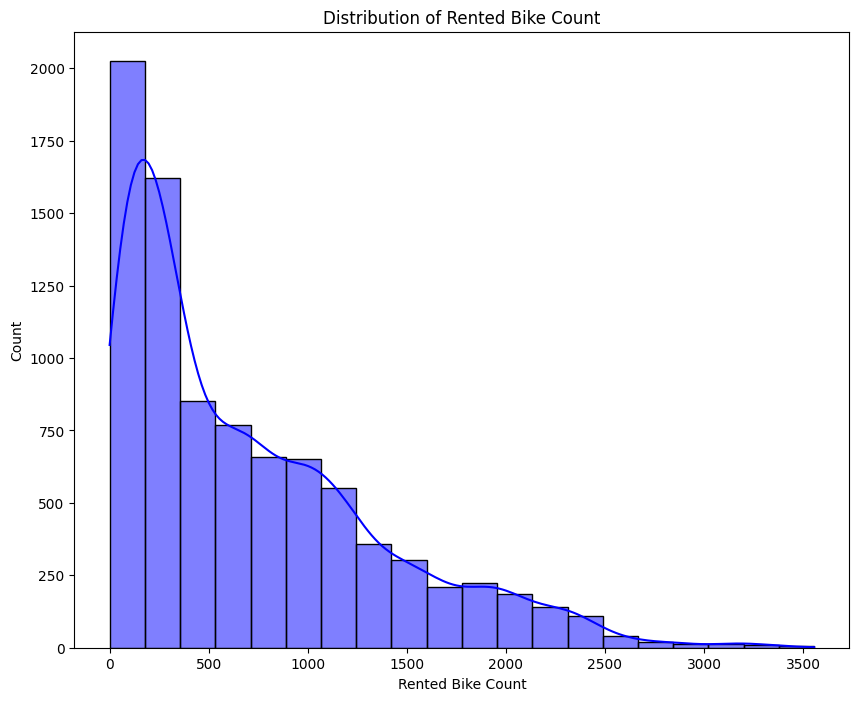

In [24]:
# Histogram - Distribution of rented bike count
plt.figure(figsize = (10, 8))
sns.histplot(Bike_df['Rented Bike Count'], bins = 20, kde = True, color = "Blue")
# labels
plt.xlabel('Rented Bike Count')
plt.ylabel('Count')
plt.title('Distribution of Rented Bike Count')
plt.plot()


##### 1. Why did you pick the specific chart?

Histogram helps to understand patterns, identifying outliers and assess data characteristics like central tendency and skewness.

##### 2. What is/are the insight(s) found from the chart?

* Most of the hours haves rental count between 0 and 500.

* It secures moderate number of values between 500 and 1000 after that it tends to very low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1)We can tell that bike rentals exhibit a left-skewed distribution, meaning that during most hours, the rental count remains below 500. However, this should not be viewed negatively.

2)Typically, bike rentals peak during office rush hours and decline during nighttime. Since rentals are measured across the entire day, we can consider the overall distribution to be moderate rather than extreme.

#### Chart 2: Hourly demand on Average

[]

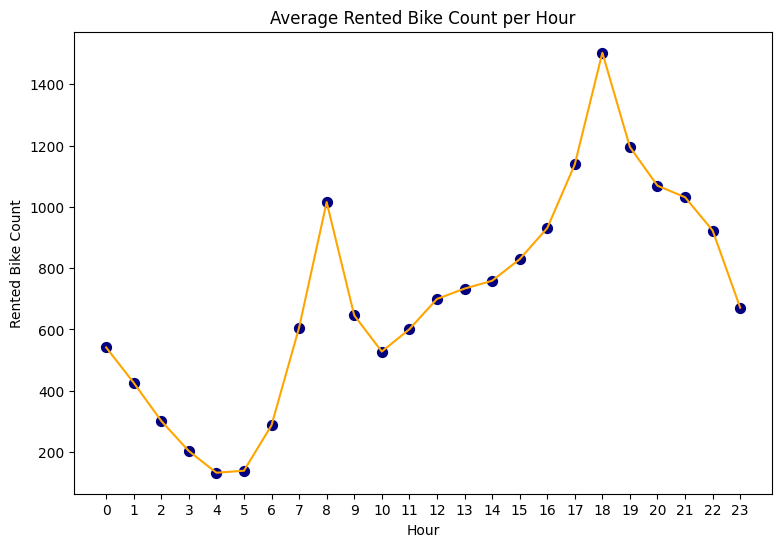

In [25]:
# Plot the bar chart
# Line chart - hour vs rented bike count
hour_wise_rented_avg = Bike_df.groupby('Hour')['Rented Bike Count'].mean().sort_values(ascending = False).reset_index() # data for plotting

plt.figure(figsize = (9, 6))
# plot code
sns.lineplot(x = 'Hour', y = 'Rented Bike Count', data = hour_wise_rented_avg, color = 'orange')
plt.scatter(hour_wise_rented_avg['Hour'], hour_wise_rented_avg['Rented Bike Count'], color='navy', s=50, label="Bike Count")
# labels
plt.xticks(range(0, 24))
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Average Rented Bike Count per Hour')
plt.plot()

##### 1. Why did you pick the specific chart?

Line charts displays data points connected by straight line making it visualizing trends and changes over time.

##### 2. What is/are the insight(s) found from the chart?

1) The chart shows a notable peak in bike rental demand during the morning hours, specifically from 7 to 9 AM. This suggests a high demand from people who are likely using bikes for their daily routine to work or other morning activities.

2) There is a significant surge in demand observed in the evening hours, particularly from 5 to 7 PM. This peak indicates that bikes are also popular for returning back home from work or for evening activities.

3) During the hours between 10 AM and 5 PM, there is a general upward trend in bike rental demand. This could suggest a steady usage pattern throughout the day, potentially for leisure activities, short trips etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can potentially create a positive impact on the bike rental business:

1)Optimized Resource Allocation: Understanding the peak hours (morning and evening) allows the business to optimize bike inventory. They can ensure sufficient bikes are available during peak times to meet customer demand, thereby enhancing customer satisfaction and retention.

2)argeted Marketing and Promotions: With knowledge of peak hours, the business can implement targeted marketing campaigns and promotions. For example, offering discounts or incentives during off-peak hours to encourage more consistent bike usage throughout the day.

Since the chart itself does not reflect any insights that might lead to negative growth, but bike rental service company need to have sufficient bikes in the peak hours (observed in the chart) to meet customer satisfaction.

#### Chart 3: Rented Bike Count Vs Funtioning Day

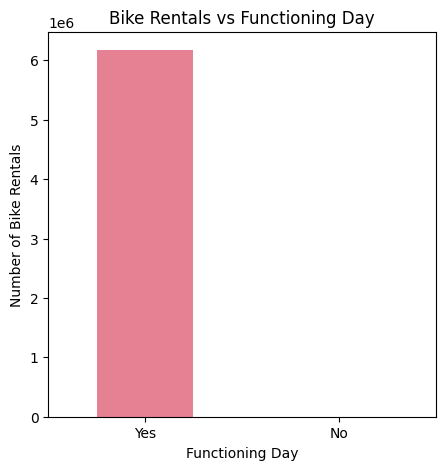

In [26]:
# Bar plot - Function day vs non function day
Functioning_Day = Bike_df.groupby('Functioning Day')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize = (5, 5))
sns.barplot(x = 'Functioning Day', y = 'Rented Bike Count', data = Functioning_Day, palette = 'husl', width = 0.5)

plt.xlabel("Functioning Day")
plt.ylabel("Number of Bike Rentals")
plt.title("Bike Rentals vs Functioning Day")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen for this visualization because it effectively represents categorical data (Functioning day) and associated quantitative values (bike counts). The bars corresponding to the count of rented bikes allow for easy visualization and comparison of the results.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

* The chart shows that 6,172,314 bikes were rented on functional (operational) days, indicating a robust demand for bike rentals during operational days. The absence of non-functional days suggests that the company did not shut down operations on any day during the observed period.

* There is no booking on non functioning days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* We can say that from given dataset non working days doesn't hold any rides and it helps us to remove the feature before giving to ML model.

* Since the chart itself does not reflect any insights that might lead to negative growth, but it needs to be consider that if the company's operational days do not align with customer needs (e.g., closures on peak demand days or non-availability of bikes), it could affect business revenue and lead to negative customer experiences.

#### Chart 4 : Impact of Rainfall on Bike Rentals

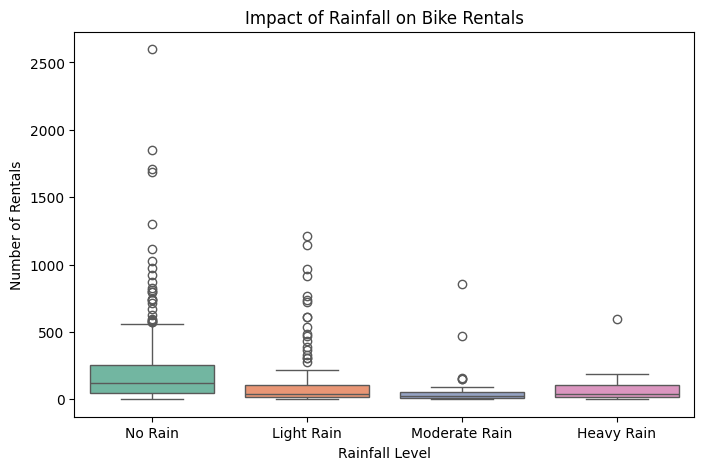

In [27]:
# Box plot Rainfall vs Bike rentals
Bike_df_rain = Bike_df.copy()
Bike_df_rain['Rainfall_Category'] = pd.cut(Bike_df['Rainfall(mm)'], bins=[0, 1, 5, 10, 50], labels=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Rainfall_Category', y='Rented Bike Count', data=Bike_df_rain, palette="Set2") # plot code
# labels
plt.xlabel("Rainfall Level")
plt.ylabel("Number of Rentals")
plt.title("Impact of Rainfall on Bike Rentals") # title
plt.show()

##### 1. Why did you pick the specific chart?

* Box plot with different bins explains the statistical quantities well, we can easily get percentiles and mean values.
* Box plot displays median(middle value), first quartile(Q1) and third quartile(Q3) of dataset within a box.

##### 2. What is/are the insight(s) found from the chart?

The plot signifies that bikes are rented on days with very low or no rainfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Optimize Resource Allocation: Knowing that bikes are mostly rented on days with low or no rainfall the company allocate resources more efficiently, ensuring enough bikes are available on days with favorable weather.

* Maintenance Scheduling: Maintenance can be scheduled on days with higher expected rainfall o, as bike rentals are likely to be lower.

* If the company is not prepared for extreme weather conditions, it might lead to negative customer experiences.

#### Chart 5: Bike Rental Vs Weather(Temperature and Humidity)

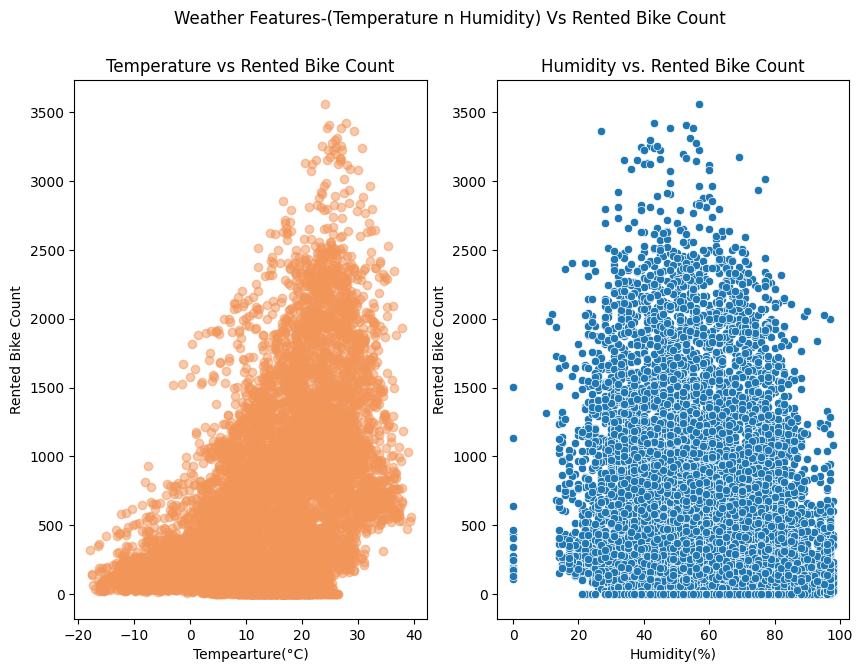

In [28]:
# Setting figure size and title for the plot
plt.figure(figsize= (10, 7))
plt.suptitle("Weather Features-(Temperature n Humidity) Vs Rented Bike Count")

# Plot 1. Temperature vs. Rented Bike Count
plt.subplot(1, 2, 1)
plt.scatter(Bike_df["Temperature(°C)"], Bike_df["Rented Bike Count"], color = "#f29559", alpha= 0.5)
plt.title("Temperature vs Rented Bike Count",)
plt.xlabel("Tempearture(°C)" )
plt.ylabel("Rented Bike Count")

# Plot 2. Humidity vs. Rented Bike Count
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Humidity(%)', y = 'Rented Bike Count', data = Bike_df)
plt.title("Humidity vs. Rented Bike Count", size= 12)
plt.xlabel("Humidity(%)")
plt.ylabel("Rented Bike Count")

plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots were chosen for this visualization because it directly shows the relationship between weather features (Temperature, Humidity) and rented bike count.

Scatter plots are ideal for visualizing the patterns, outliers and the trend associated with data.

##### 2. What is/are the insight(s) found from the chart?

* The first plot between temperature and rented bike counts represents a left-skewed distribution, showing that most data points are clustered in the temperature range of 25 to 30°C. This suggests that bike rentals are more frequent when the temperature is in this moderate range or a bit a higher.

* The second plot between humidity and rented bike counts represents a normal distribution, showing that most data points are clustered in the humidity range of 20 to 80%. This suggests that bike rentals are relatively stable across a wide range of humidity levels, with peak rentals occurring in moderate humidity.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* By understanding that bike rentals are higher in the temperature range of 25 to 30°C , the company can target marketing and promotional efforts during these favorable conditions to maximize rentals.

* Knowing that bike rentals are stable across moderate humidity levels, the company can optimize bike availability to ensure a sufficient number of bikes are ready for rental during these conditions

###### There are also some potential negative implications of the insights that need to be addressed:
1)Extreme temperatures outside the comfortable range of 25 to 30°C could reduce rentals.

#### Chart 6 :  Bike Rental Vs Weather(Visibility and Wind Speed)

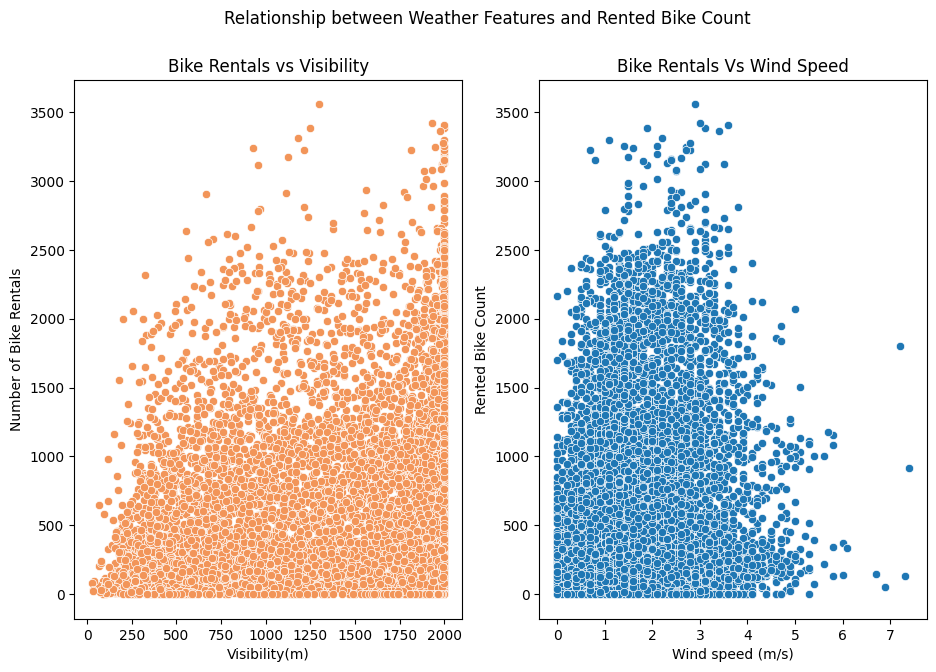

In [29]:
# Setting figure size and title for the plot
plt.figure(figsize= (11, 7))
plt.suptitle("Relationship between Weather Features and Rented Bike Count")


# plot 1 - Visibility vs rental count
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Visibility (10m)', y = 'Rented Bike Count',color = "#f29559", data = Bike_df)
# labels
plt.xlabel("Visibility(m)")
plt.ylabel("Number of Bike Rentals")
plt.title("Bike Rentals vs Visibility")

# Plot 2. Wind speed vs. Rented Bike Count
plt.subplot(1, 2, 2)
sns.scatterplot(x='Wind speed (m/s)',y='Rented Bike Count',data=Bike_df)
plt.title("Bike Rentals Vs Wind Speed")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Rented Bike Count")


plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots were chosen for this visualization because it directly shows the relationship between weather features ( Wind Speed & Visibility) and rented bike count. Scatter plots are ideal for visualizing the patterns, outliers and the trend associated with data.

##### 2. What is/are the insight(s) found from the chart?

* The  plot between visibility and rented bike counts represents a left-skewed distribution, suggesting that days with higher visibility tend to have a higher number of rented bikes.

* The plot between wind speed and rented bike counts represents a right-skewed distribution, showing that most data points are clustered in the wind speed range of 0 to 4 m/s. This suggests that lower wind speeds are more favorable for bike rentals, as higher wind speeds might restrict people from renting bikes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* During days with higher visibility, the company can target marketing and promotional efforts during these favorable conditions to maximize rentals.

* Knowing that bike rentals are stable across low wind speeds, the company can optimize bike availability to ensure a sufficient number of bikes are ready for rental during these conditions.

* The right-skewed distribution for wind speed indicates that higher wind speeds might affect bike rentals. Similarly, extreme temperatures outside the comfortable range of 25 to 30°C could reduce rentals.


#### Chart 7: Bike Rentals on Holidays n Regular Days

In [30]:
holiday_count = Bike_df.groupby("Holiday")["Rented Bike Count"].sum()
holiday_count

,Rented Bike Count
Holiday,
Holiday,215895
No Holiday,5956419


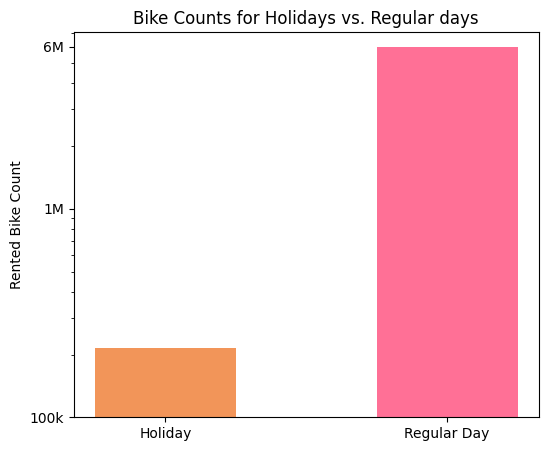

In [31]:
# Define color for the chart
colors = ["#f29559", "#ff7096"]

# Plot the bar chart
plt.figure(figsize= (6, 5))
bars = plt.bar(holiday_count.index, holiday_count, width= 0.5, color= colors)

# Set chart title and axis labels
plt.title("Bike Counts for Holidays vs. Regular days")
plt.xlabel("")
plt.ylabel("Rented Bike Count")

# Custom x-axis labels and y-axis range
plt.xticks([0, 1], ['Holiday', 'Regular Day'])
plt.yscale('log')
plt.yticks(ticks= [1e5, 1e6,  6e6], labels= ['100k', '1M', '6M'])

plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen for this visualization because it effectively represents categorical data (Holiday) and associated quantitative values (bike counts). The bars corresponding to the count of rented bikes allow for easy visualization and comparison of the results.

##### 2. What is/are the insight(s) found from the chart?

* The number of rented bikes on non-holidays (regular days) is significantly higher than on holidays, which indicates that people are more likely to rent bikes for daily commuting or regular activities during workdays.

* The lower demand for rented bikes on holidays indicates that fewer people opt for bike rentals during holidays compared to regular days, the reason could be whether they prefer to stay at home or they have other transportation preferences like personal or public vehicles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding the higher demand for rented bikes on regular days compared to holidays allows the business to optimize staffing and bike availability accordingly.

* This insight enables targeted marketing and promotional strategies to attract more customers on holidays and maintain service efficiency on regular days.

* The lower demand for rented bikes on holidays could potentially lead to negative growth if not addressed. Implementing targeted marketing tactics such as free rides for handful of lucky customers and discount offers would be essential to incentivize customers to choose bike rentals during holidays.



#### Chart 8  : Bike rental vs seasons and holidays

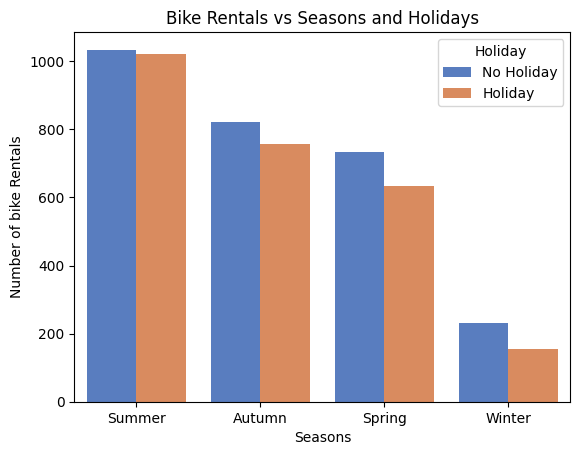

In [32]:
# Bar plot - Bike rental vs seasons and holidays
sns.barplot(data = season_and_holiday_wise_rented_count, x = 'Seasons', y = 'Rented Bike Count', hue = 'Holiday', palette = 'muted') # plot code
# lables
plt.xlabel("Seasons")
plt.ylabel("Number of bike Rentals")
plt.title("Bike Rentals vs Seasons and Holidays") # title
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot with holiday as hue and season, rental counts as variables helps in identifying relationships between them quickly.

##### 2. What is/are the insight(s) found from the chart?

During summer rental is usually high and high rental happens during working days and rentals are lowest in winter.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* We can schedule maintainance acticities during winters where bike rentals are too low.

* Placing high number of bikes in rental areas during summer season may help in reducing shortage.

* Making marketing campaigns during winters with collaboration with any winter acticity planners may increase count during low rental times.

#### Chart 9 : Correlation Map

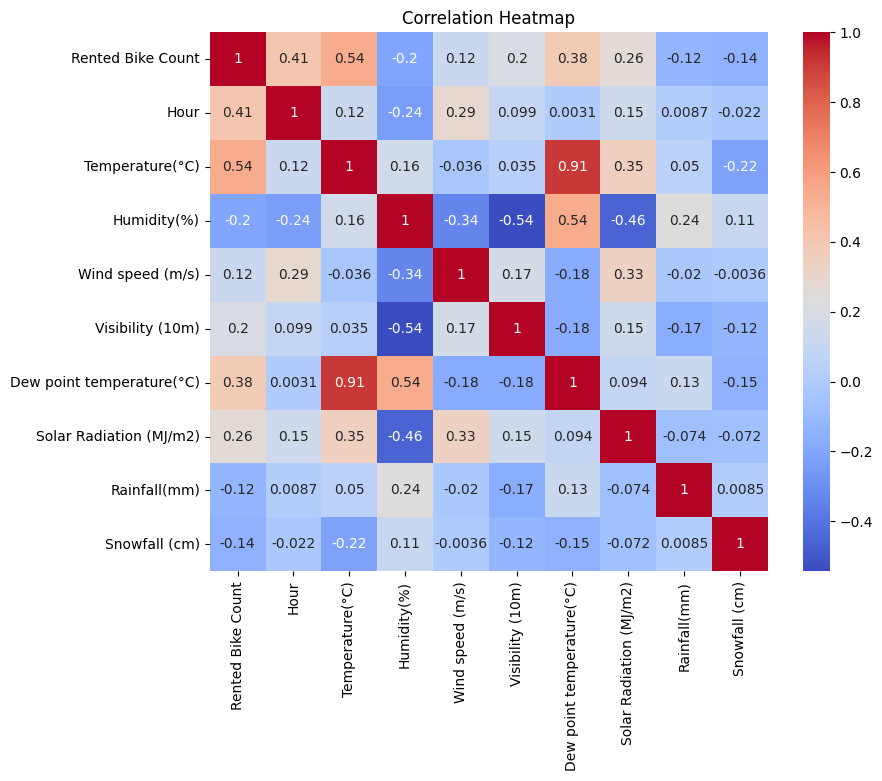

In [33]:
# data prep
Bike_df_numeric = Bike_df.select_dtypes(exclude = ['object', 'datetime64[ns]', 'category'])


# Correlation Heatmap visualization code
plt.figure(figsize=(9, 7))
sns.heatmap(Bike_df_numeric.corr(), annot=True, cmap='coolwarm') # plot code
plt.title('Correlation Heatmap') # title
plt.show()

##### 1. Why did you pick the specific chart?

* A correlation heatmap was chosen to visualize the relationships between multiple variables in the dataset for several reasons:

* The heatmap is specifically suited for analyzing the correlation coefficient between numerical variables and quantify the strength and direction of the relationships between pairs of columns.

* The color and intensity of each cell represent the correlation coefficient between two variables. Dark red cells indicate strong positive correlations, while dark blue cells represent strong negative correlations.

##### 2. What is/are the insight(s) found from the chart?

* The correlation coefficient between Temperature(°C) and Rented Bike Count is 0.54, indicating a moderately strong positive correlation. This suggests that as the temperature increases, the number of rented bikes tends to increase.

* The correlation coefficient between Dew Point Temperature(°C) and Temperature(°C) is 0.90, indicating a strong positive correlation. This suggests that as the temperature increases, the Dew Point Temperature(°C) also increase.

* The correlation coefficient between Humidity(%) and Rented Bike Count is -0.20, indicating a weak negative correlation. This suggests that as humidity increases, the number of rented bikes may tend to decrease slightly.

* The correlation coefficients for Rainfall(mm) and Snowfall (cm) are both negative, but their values are close to zero. This suggests a weak negative relationship with the number of rented bikes.

* Hour, Temperature, Dew Point Temperature and Solar Radiation have the highest positive correlations with Rented Bike Count. These variables may be important predictors in further regression model building.

#### Chart 10 :Pair Plot

<Figure size 1200x700 with 0 Axes>

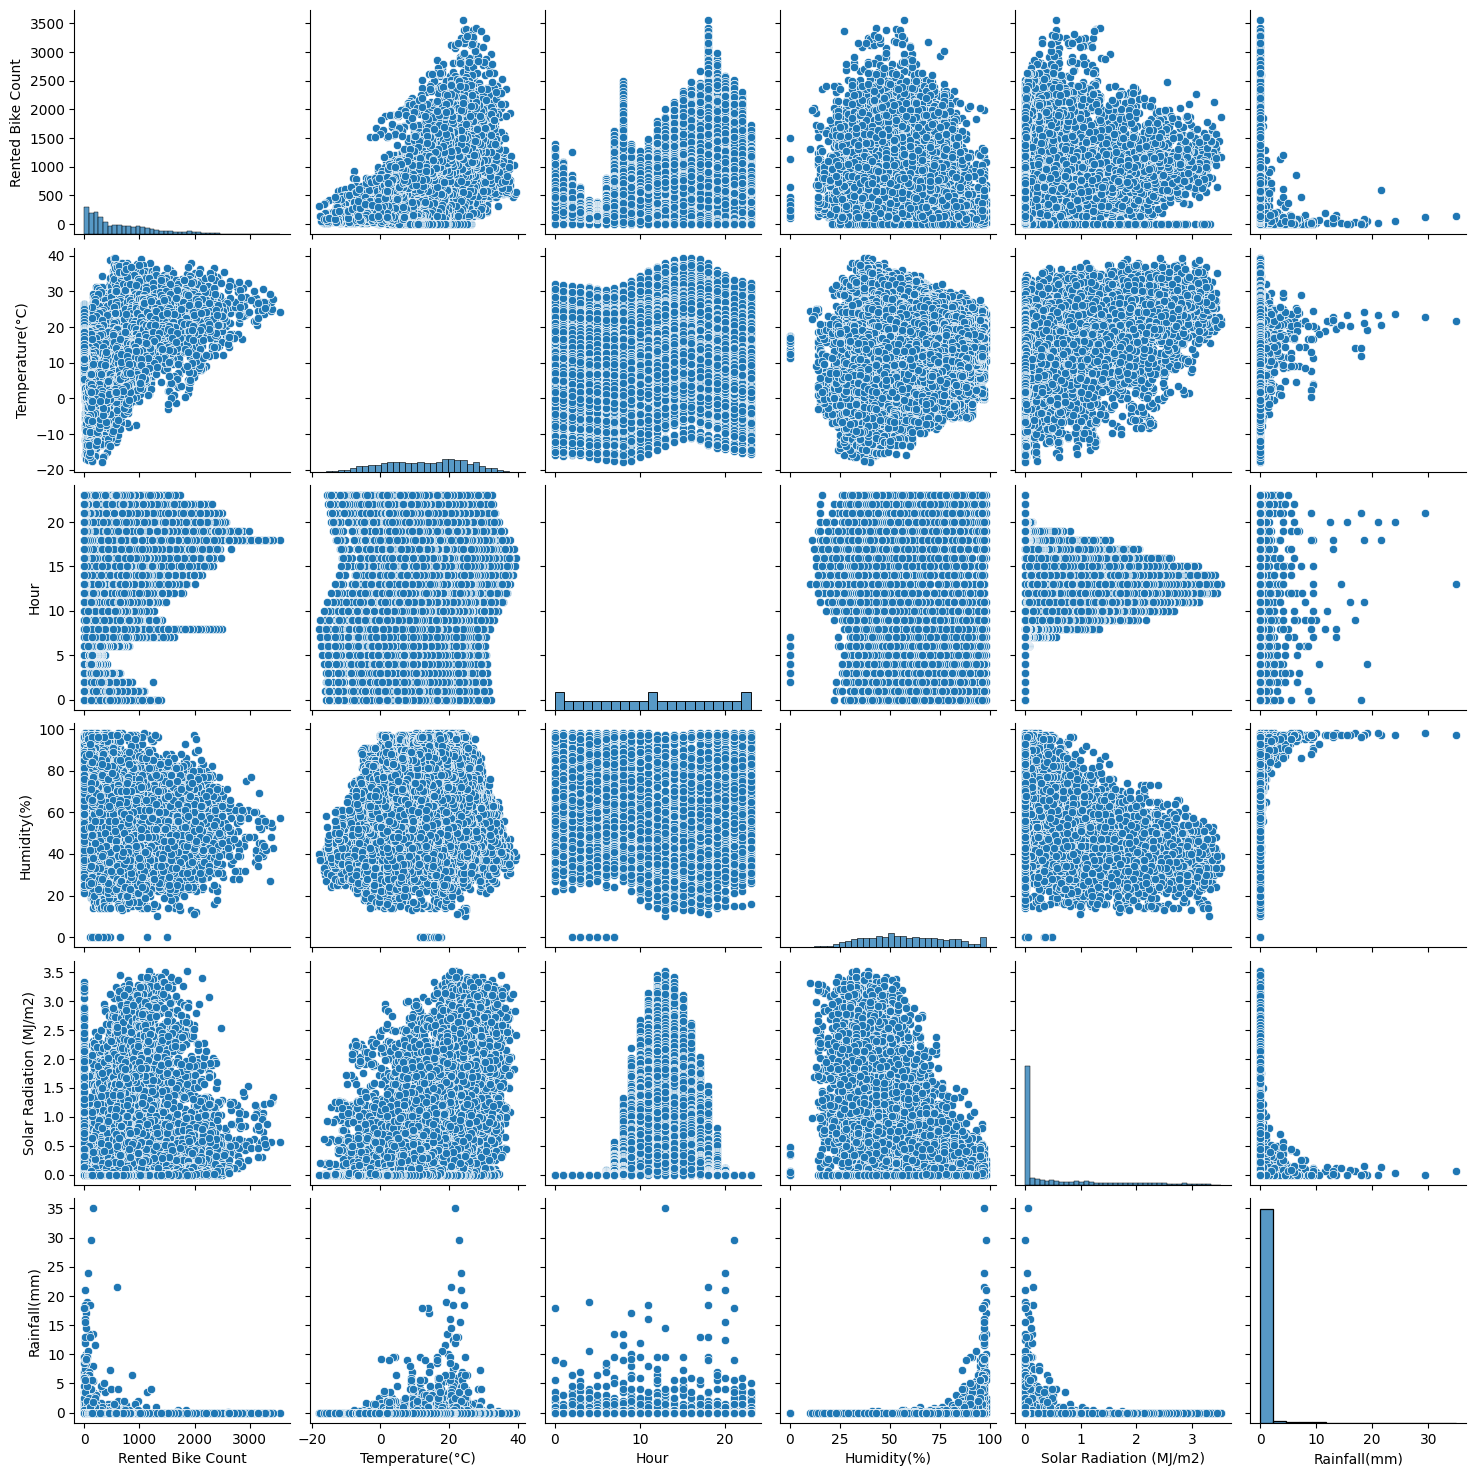

In [34]:
# Pair Plot visualization code
plt.figure(figsize=(12,7))
sns.pairplot(Bike_df_numeric, vars=['Rented Bike Count', 'Temperature(°C)', 'Hour', 'Humidity(%)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)'])
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot was chosen to visualize the relationships between pairs of variables in the dataset due to the following reason:

* The pair plot displays scatter plots for every possible pair of variables in the dataset on a single grid. This allows to visually assess both pairwise relationships and identify potential patterns or trends across all variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?

* This mostly describes the relations we already visualized, we can use this as consolidated overview report for all of those visualizations.

1)Hour vs. Rented Bike Count.

2)Temperature vs. Rented Bike Count.

3)Humidity vs. Rented Bike Count

* Solar Radiation vs. Rented Bike Count: The right-skewed distribution implies that as solar radiation increases, the demand for rented bikes tends to increase. This suggests that sunny days might lead to higher bike usage.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothetical Statement 1**: Higher temperatures increases number of bike rentals.

**Hypothetical Statement 2**: Humidity levels impact bike rental.

**Hypothetical Statement 3**: There is no significant difference in bike rentals between working days and holidays.

### Hypothetical Statement 1 :(Higher temperatures increases number of bike rentals)


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀): Temperature does not significantly increase the number of rented bikes.

* Alternative Hypothesis (H₁): Higher temperatures significantly increase the number of rented bikes.

#### 2. Perform an appropriate statistical test.

In [35]:
#Import library
import statsmodels.api as sm

In [36]:
# Perform Statistical Test to obtain P-Value
# Define variables
X = Bike_df["Temperature(°C)"]
y = Bike_df["Rented Bike Count"]

# Add a constant to the independent variable (temperature)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary statistics
summary= model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:18:30   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             329.9525      8.541     38.631      0.000     313.210     346.695
Temperature(°C)    29.0811      0.486     59.816      0.000      28.128      30.034
==============================================================================
Omnibus:                      954.681   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.965
Skew:                           0.817   Prob(JB):                    1.68e-309
Kurtosis:                       4.108   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Which statistical test have you done to obtain P-Value?

I performed a simple linear regression using the Ordinary Least Squares (OLS) method.

##### Why did you choose the specific statistical test?

1)OLS regression was chosen because it effectively models the linear relationship between a continuous dependent variable (Rented Bike Count) and a continuous independent variable (Temperature(°C)). It allows an easy interpretation and provides statistical tests (t-test for coefficients) to determine if the relationships are statistically significant.

2)OLS regression is a widely used method in many fields for predicting a continuous outcome and is standard in cases where the assumptions of linear regression are reasonably met.

**Conclusion**

1) The coefficient for Temperature(°C) is approximately 29.08.

The p-value associated with the coefficient is 0.000.

This concludes,

* Since the p-value is extremely low (p < 0.05), we reject the null hypothesis. This indicates that temperature has a statistically significant impact on the number of bikes rentals.

Therefore, we say higher temperatures indeed increases the number of rented bikes. This supports our Hypothetical Statement 1.

### Hypothetical Statement 2: (Humidity levels impact bike rental)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀): Humidity does not significantly impact the number of rented bikes.

* Alternative Hypothesis (H₁): Humidity levels have a significant effect on bike rentals.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value
# Define variables
X = Bike_df["Humidity(%)"]

# Add a constant to the independent variable (temperature)
X = sm.add_constant(X)

# Fit the regression model
model_2 = sm.OLS(y, X).fit()

# Get the summary statistics
summary= model_2.summary()
summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     364.1
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           1.48e-79
Time:                        11:18:30   Log-Likelihood:                -68922.
No. Observations:                8760   AIC:                         1.378e+05
Df Residuals:                    8758   BIC:                         1.379e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1073.0702     20.457     52.454      0.000    1032.969    1113.172
Humidity(%)    -6.3282      0.332    -19.081      0.000      -6.978      -5.678
==============================================================================
Omnibus:                     1397.326   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2177.696
Skew:                           1.132   Prob(JB):                         0.00
Kurtosis:                       3.915   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Which statistical test have you done to obtain P-Value?

I performed a simple linear regression using the Ordinary Least Squares (OLS) method.

##### Why did you choose the specific statistical test?

OLS regression was chosen because it effectively models the linear relationship between a continuous dependent variable (Rented Bike Count) and a continuous independent variable (Humidity). It allows an easy interpretation and provides statistical tests (t-test for coefficients) to determine if the relationships are statistically significant.

OLS regression is a widely used method in many fields for predicting a continuous outcome and is standard in cases where the assumptions of linear regression are reasonably met.

**Conclusion**:

The coefficient for Humidity(%) is approximately -6.33.

The p-value associated with the coefficient is 0.000

This concludes:

* Since the p-value is extremely low (p < 0.05), we reject the null hypothesis. This indicates that humidity levels has a statistically significant impact on the number of bikes rentals.

Therefore, we can say that humidity indeed impacts the number of rented bikes. This supports our Hypothetical Statement 2.

### Hypothetical Statement 3: (There is no significant difference in bike rentals between working days and holidays)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀): There is no significant difference in bike rentals between working days and holidays.

* Alternative Hypothesis (H₁): There is a significant difference in bike rentals between working days and holidays.

#### 2. Perform an appropriate statistical test.

In [38]:
#Import libraries
import scipy.stats as stats

In [39]:
# Perform Statistical Test to obtain P-Value
Bike_df["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [40]:
# Define variables
working_days = Bike_df[Bike_df["Holiday"] == "No Holiday"]["Rented Bike Count"]
holidays = Bike_df[Bike_df["Holiday"] == "Holiday"]["Rented Bike Count"]

# Perform t-test
t_stat, p_value = stats.ttest_ind(working_days, holidays)
t_stat, p_value

(np.float64(6.7874340454159166), np.float64(1.2156443235024855e-11))

##### Which statistical test have you done to obtain P-Value?

I performed an independent two-sample t-test to compare bike rentals on working days and holidays.

##### Why did you choose the specific statistical test?

I choose this test because, this test is appropriate for comparing the means of two independent groups (in this case, bike rentals on working days and holidays).

 It helps determine if there is a significant difference between the two groups.

**Conclusion:**

The t-statistic is approximately 6.79

The p-value is very close to zero (1.22e-11)

This concludes:

* Since the p-value is extremely low (p < 0.05), we reject the null hypothesis. This indicates that there is a statistically significant difference in bike rentals between working days and holidays.

Therefore, we can say that there is indeed a significant difference in bike rentals between working days and holidays. This supports our Hypothetical Statement 3.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [41]:
# Handling Missing Values & Missing Value Imputation
# Find number of missing values in each variables
Bike_df.isna().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


In [42]:
# removing hours that respect to non functional days
Bike_df = Bike_df[Bike_df['Functioning Day'] == 'Yes']
Bike_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


#### What all missing value imputation techniques have you used and why did you use those techniques?

* Since there are no missing values in the dataset, there is no need to use any missing value imputation techniques.

* We just removed values that belongs to non functional days which doesn't holds any rentals.

### 2. Handling Outliers

In [43]:
# Handling Outliers & Outlier treatments
# fetch overview about the dataset
Bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000


**Rented Bike Count**:

In [44]:
# find out hours with high rentals
Bike_df_high_rent = Bike_df[Bike_df['Rented Bike Count'] > 2500]

In [45]:
# try to findout any patterns that cause this high count
Bike_df_high_rent.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0
mean,2864.061856,18.360825,24.762887,49.474227,2.325773,1706.711340,12.925773,0.622474,0.001031,0.0
std,281.350864,0.664354,4.549114,10.958342,0.755849,427.140735,5.844304,0.405807,0.010153,0.0
min,2505.000000,17.000000,12.200000,27.000000,0.700000,554.000000,-1.600000,0.000000,0.000000,0.0
25%,2628.000000,18.000000,22.600000,42.000000,1.800000,1550.000000,9.000000,0.280000,0.000000,0.0
50%,2807.000000,18.000000,25.200000,48.000000,2.400000,1977.000000,13.100000,0.560000,0.000000,0.0
75%,3123.000000,19.000000,27.100000,57.000000,2.900000,2000.000000,16.600000,0.940000,0.000000,0.0
max,3556.000000,21.000000,35.400000,77.000000,3.800000,2000.000000,23.500000,1.530000,0.100000,0.0


* Hours mentioned here are peak hours which we are noted earlier.

* All other natural causes also in the way that boosts rental count.

We may conclude that the high rental is not an outlier.

**Humidity**:

Total Outliers: 17


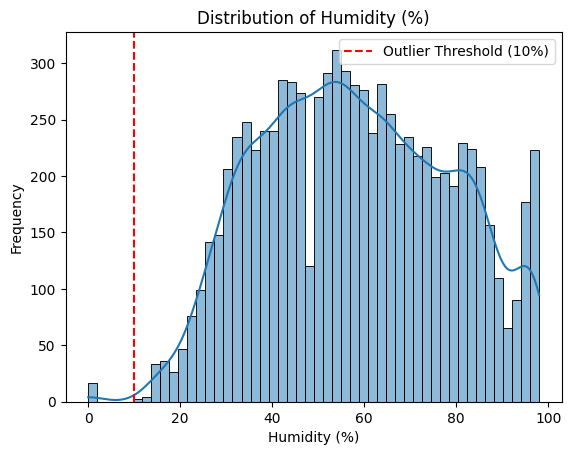

In [46]:
# Identify outliers
humidity_outliers = Bike_df[Bike_df['Humidity(%)'] < 10] # rows with humidity less than 10%
print(f"Total Outliers: {len(humidity_outliers)}")

# Visualize humidity distribution
sns.histplot(Bike_df['Humidity(%)'], bins=50, kde=True) # plot code
plt.axvline(x=10, color='r', linestyle='--', label="Outlier Threshold (10%)") # axv line for seperating low humidity
# labels
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Humidity (%)") # title
plt.legend()
plt.show()

In [47]:
# Remove humidity outliers (<10%)
Bike_df = Bike_df[Bike_df['Humidity(%)'] >= 10]

# Check new shape
print(f"New dataset size: {Bike_df.shape}")


New dataset size: (8448, 14)


* From the visualization we can see that 0% humidity is noted in some cases, Which is not possible in normal areas.

* Usually there must be some amount of humidity in air present at normal aeas.

* 0% humidity is only possible in dessert areas.
So we have marked them as data entry error and removed the same.

### 3. Categorical Encoding

In [48]:
# Encode your categorical columns
# findout categorical variables from the dataset
Bike_df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Categorical variables:

* Seasons
* Holiday
* Functioning Day

In [49]:
# install necessary module
! pip install category_encoders

**Seasons**

In [50]:
# import library
import category_encoders as ce

label_encoder = ce.OrdinalEncoder() # initialize encoder
df_label_encoded = label_encoder.fit_transform(Bike_df['Seasons']) # fit encoder with respective variable
Bike_df['Seasons'] = df_label_encoded # apply the changes in dataset

**Holidays**

In [51]:
# encode holiday variable
ordinal_encoder = ce.OrdinalEncoder(mapping=[{'col': 'Holiday', 'mapping': {'No Holiday': 0, 'Holiday': 1}}])
Bike_df = ordinal_encoder.fit_transform(Bike_df)


#### What all categorical encoding techniques have you used & why did you use those techniques?

* Out of three categorical variables we have encoded two.

* For both we just used ordinal encoder to encode the variables.

### Feature Manipulation and Selection

#### 1. Feature Manipulation

**Dew Point Temperature**

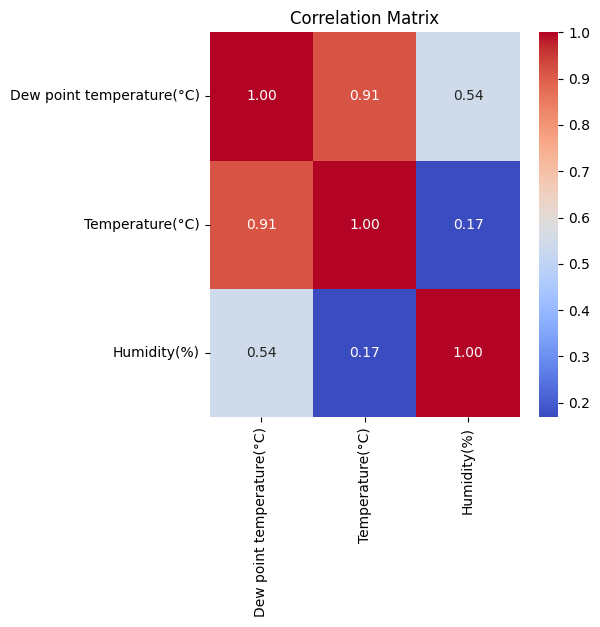

In [52]:
# get relationship between dew point, temperature and humidity
corr_matrix = Bike_df[['Dew point temperature(°C)', 'Temperature(°C)', 'Humidity(%)']].corr()

# Visualize correlation
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

* Mathematically due point is calculated using humidity and temperature.

* We can clearly see that dew point is more correlated with temperature.

**Day of the week**

In [53]:
# find out weekdays and weekends
Bike_df['Date'] = pd.to_datetime(Bike_df['Date'], format='%d/%m/%Y', dayfirst=True) # convert date variable to suitable formate

Bike_df['Weekday'] = Bike_df['Date'].dt.dayofweek # findout weekday

# create a feature that maps whether the day is weekend or weekday
Bike_df['Weekend'] = Bike_df['Weekday'].apply(lambda x: 1 if x > 4 else 0)

Bike_df


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,Yes,4,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,Yes,4,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,Yes,4,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,Yes,4,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,Yes,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,0,Yes,4,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,0,Yes,4,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,0,Yes,4,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,0,Yes,4,0


In [54]:
# findout the difference between weekend and weekday rental count
Weekend = Bike_df.groupby('Weekend')['Rented Bike Count'].mean().sort_values(ascending = False).reset_index()
Weekend['Rented Bike Count'] = Weekend['Rented Bike Count'].astype(int)

Weekend

,Weekend,Rented Bike Count
0,0,748
1,1,682


#### 1. Feature Selection

In [55]:
# Select your features wisely to avoid overfitting
Bike_df.drop(columns = ['Date', 'Dew point temperature(°C)', 'Functioning Day', 'Weekday'], inplace = True) # drop unwanted features


In [56]:
# columns that we are using to develop our model
Bike_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Weekend'],
      dtype='object')

#### What all feature selection methods have you used and why?

We used correlation analysis to determine if the dew point temperature variable offers unique information or if it's redundant.

#### Which all features you found not important and why?


* Date - As we have season and fetched weekend variables from date we don't need this anymore.

* Dew point temperature - As we have seen in correlation heatmap, this variable is more similar to temperature variable which may cause model complexity towards single perameter.

* Functioning Day - As we have filtered non functioning days which don't have any rents, now this variable only consists single value throughout the dataset.

* Weekday - We just created this variable to get weekend or weekday.

### 5. Data Scaling

In [57]:
# scaling the data
from sklearn.preprocessing import StandardScaler # import library

scaler = StandardScaler() # nitialize scaler
num_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'] # features to be scaled

Bike_df[num_features] = scaler.fit_transform(Bike_df[num_features]) # fit the scale


##### Which method have you used to scale you data and why?

Standard scaler is used due to following reasons:

* Handles outliers by default.

* Standard Scaling keeps feature distributions with zero mean and unit variance.

### 6. Data Splitting

In [59]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = Bike_df.drop(columns = ['Rented Bike Count'])
Y = Bike_df['Rented Bike Count']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

##### What data splitting ratio have you used and why?

* We have used 20% as test data.

* This was the commonly used percentage.

* 20% test data acts as a good representative of the datatset.

* Test data less than 20% may not capture the diversity of the dataset, leading to unreliable performance evaluation.

* A larger test set greater than 20% reduces the training data, which may hurt model performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

* Yes, Rented bike count is left skewed data and we can't able to prove that high rental counts are outliers.

* We have very large amount of lower rental counts and very few of high.

In [60]:
# Handling Imbalanced Dataset (If needed)
# handle rented bike count variable
Bike_df['Rented Bike Count'] = np.log1p(Bike_df['Rented Bike Count'])

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Log Transformation

* Since "Rented Bike Count" is continuous, we can apply log transformation to make the distribution more normal.

* Reduces impact of outliers.

* Improves model stability.

## ***7. ML Model Implementation***

### ML Model 1 :  Linear Regression

In [61]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression() # initialize model
linear_model.fit(X_train, Y_train) # fit train data

# Predict on the model
y_pred = linear_model.predict(X_test)

# evaluation and printing
print(f"R2 Score: {r2_score(Y_test, y_pred):.2f}")

R2 Score: 0.53


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression :

**Advantages:**

* Simple and classic regression algorithm.
* Easy to interpret.
* Fast to train.

**Disadvantages:**

* Doesn't capture non linearity well.

**Interpreting evaluation metric scores :**

* R2 score of 0.53(noted when on first time implementation) indicates that the model captures some patterns from the data but some factors are not considered which suggests improvement.

* While the model is better than a random guess, it may not be highly reliable for making precise predictions.

* We can conclude that the model is moderately good but need improvements.

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# ML Model - 1 Implementation with Cross validation technique(K-Fold CV)
from sklearn.model_selection import KFold
# Initialize K-Fold Cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the scores
scores = []

# Iterate over the folds
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Initialize and train the model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Perform predictions on the test set
    y_pred = model.predict(x_test)

    # Calculate the accuracy score
    score = r2_score(y_test, y_pred)

    # Append the score to the list
    scores.append(score)

# Calculate the average score
avg_score = sum(scores) / k

# Print the scores and average score
print("Scores:", scores)
print(f"Average Score: {avg_score:.2f}")


Scores: [0.5338695957640524, 0.5590833472575918, 0.5366622503382237, 0.5250372382207775, 0.5440284460700469]
Average Score: 0.54


##### Which hyperparameter optimization technique have you used and why?

Here, I have used the K-Fold Cross-Validation technique.

Why?

* Since we are using Linear Regression, K-Fold CV helps train the model k times with different train-test splits and provides a more reliable average R2 score, reducing the risk of overfitting to a single dataset split.

* Hyperparameter tuning methods like Grid Search CV do not significantly improve performance in this case because Linear Regression has limited hyperparameters, mainly regularization techniques (like L1 and L2 penalties in Ridge and Lasso regression).

Thus, K-Fold CV provides a more stable model evaluation rather than fine-tuning hyperparameters, which is more beneficial for complex models.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Initially, while training the model using Linear Regression, we obtained an R2 score of 0.53. However, after applying K-Fold Cross-Validation, the average R2 score improved to 0.6(noted during development stage).

* This indicates that, on average, our model can explain 60% of the variance in the target variable.

* This improvement suggests that K-Fold Cross-Validation helped achieve a more stable and reliable estimate of model performance.

### ML Model 2 : Decision Tree

In [63]:
# Visualizing evaluation Metric Score chart
# import library
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5, random_state=42) # initialize model
dt_model.fit(X_train, Y_train) # fit model

y_pred_dt = dt_model.predict(X_test) # predict

print(f"Decision Tree R² Score: {r2_score(Y_test, y_pred_dt):.2f}") # print evaluation metric score

Decision Tree R² Score: 0.73


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Decision Tree :

**Advantage :**

* It covers the linear regression's disadvantage, as this covers non-linear relationships.
* No need for feature scaling.

**Disadvantage :**

* Prone to overfitting - Decision trees are easily prone to overfit, hyperperameters like max_depth, min_splits are need to be provided well in order to reduce the overfitting.
* Sensitive to noisy data.

**Interpreting evaluation metric :**

* A score of 0.73 suggests that the Decision Tree explains most of the variability in the target variable (rental count).
* It indicates that the model is capturing important relationships in the data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Implementing Grid Search CV

# import libraries
from sklearn.model_selection import GridSearchCV
# classify parameter grids
param_grid = {
    'max_depth': [5, 10, 15, None],  # Control tree depth
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum samples required in a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for best split
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2]  # Cost complexity pruning to avoid overfitting
}

# Initialize GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print(f"Best R² Score: {grid_search.best_score_ : .2f}")

# Fit the Algorithm

# Predict on the model

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best Parameters: {'ccp_alpha': 0.2, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best R² Score:  0.87


##### Which hyperparameter optimization technique have you used and why?

Here I have used Grid Search CV

* This helps in finding out best parameter combination by iteratively applying one by one.
* Easy to implement and interpret the values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* We can see that r2 score is increased  from 73% to 87%

* By setting hyperparameters like min_samples_leaf and min_samples_split, we restricted the tree from growing too complex. This regularization reduces overfitting because it generally leads to better generalization on new data.

* A cross-validated score (87%) is often more reliable for assessing true model performance compared to a score obtained from a single train/test split or the training set.


### ML Model 3: Random Forest

In [65]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestRegressor
# Fit the Algorithm
rf_model = RandomForestRegressor(n_estimators = 100, max_depth = 10, random_state = 42)
rf_model.fit(X_train, Y_train)

# Predict on the model
y_pred_rf = rf_model.predict(X_test)

# print evaluation metrics score
print(f"Random Forest R² Score: {r2_score(Y_test, y_pred_rf):.2f}")

Random Forest R² Score: 0.91


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest Regression :

**Advantages:**

* Handles missing data well.
* Reduces overfitting which is major issue with decision trees.
* Works well with larger dataset.

**Disadvantages :**

* Computationally expensive.
* Less interpretable.

**Interpreting evaluation metric scores :**

* Random Forest R² Score: 0.91 is a significant improvement compared to the Decision Tree model (0.73 before tuning and 0.87 after Grid Search)

* Since Random forest is an ensemble method, it reduces overfitting compared to single decision tree.

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Random Search CV
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_dist = {
    'n_estimators': np.arange(50, 500, 50),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Depth of each tree
    'min_samples_split': [2, 5, 10, 20],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4, 10],  # Min samples per leaf
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider
    'bootstrap': [True, False]  # Whether to use bootstrapping
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Optimize for R² score
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(X_train, Y_train)

# Print best parameters and R² score
print("Best Parameters:", random_search.best_params_)
print(f"Best R² Score: {random_search.best_score_ :.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': np.int64(400), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 40, 'bootstrap': True}
Best R² Score: 0.92


##### Which hyperparameter optimization technique have you used and why?

Random Search CV :

* It randomly samples hyperparameter combinations instead of exhaustively searching all possible combinations (like GridSearchCV).

* It is faster, especially when dealing with a large dataset and many hyperparameters.

* It can discover better hyperparameters by exploring a wider range of values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* We can't say this CV is appropriate than Random Forest.

* Random Forest itself an ensemble method that works like random forest in order on selecting hyperperameters and samples.

* Since we are getting high R2 values using Random forest and we also have an assumption that it doesn't overfit we can conclude that random forest itself a better model.

* Also Random search CV is computationally much more expensive and takes large time to train the model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We consider  **R2 Score** Over Other Metrics

When evaluating a regression model, multiple metrics exist (e.g., RMSE, MAE, MAPE). However, R2 Score is often preferred in business impact analysis due to the following reasons:

* R2 Measures the Overall Goodness of Fit, Explains the proportion of variance captured by the model, Other metrics like RMSE only measure raw error without indicating model fit.

* Easier for Stakeholders to Understand.

* Easier to Compare Across Different Models.

* Balances Accuracy and Overfitting.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We choose **Random Forest** Over Decision Tree & Linear Regression

In this project, we compared Random Forest, Decision Tree, and Linear Regression models to predict rental counts. Random Forest outperformed the other two models based on evaluation metrics and business impact.

**Advantages :**

* Handles overfitting better.
* More stable predictions.
* Despite decision trees this model handles noises by averaging multiple trees.
*Captures non linearity which makes this better from linear regression.
Balances bias and variances which is a main cause in other two models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

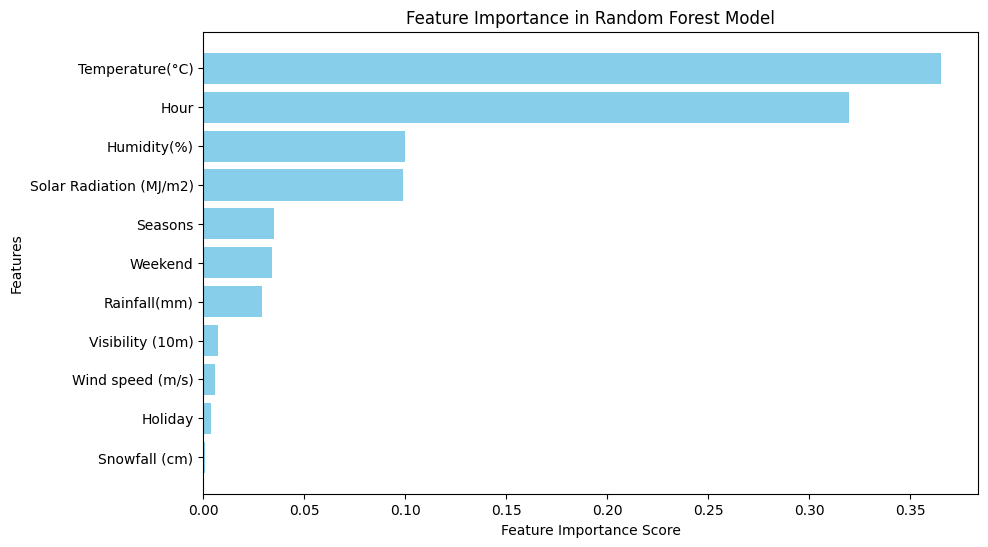

In [67]:
# Get feature importance
feature_importance = rf_model.feature_importances_

# Convert to DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [68]:
# Save the File
import joblib

# Save the model
joblib.dump(rf_model, "bike_rental_model.joblib")

['bike_rental_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [69]:
# Load the File and predict unseen data.
loaded_model = joblib.load("bike_rental_model.joblib")

# Make predictions
y_pred = loaded_model.predict(X_test)


In [72]:
print((y_pred[:4]))
print(Y_test[:4].values)

[ 105.78017249 1880.83656745  149.25311092  970.76985366]
[ 116 1615  174  882]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Insights found through EDA :**

* Impact of Climate on Rentals - Bike rentals are strongly influenced by weather conditions. Yulu should consider implementing advanced weather prediction techniques or partnering with weather forecasting companies to better manage demand fluctuations.

* Peak Demand During Work Hours - Rental demand is significantly higher on working days, especially during office rush hours. Ensuring an adequate supply of bikes during these peak periods is essential for smooth operations.

* Seasonal Demand Fluctuations - Rentals drop significantly during winter. This period can be utilized for bike maintenance and infrastructure improvements to enhance service quality.

* Boosting Rentals During Low-Demand Periods - Offering discounts, loyalty programs, or complementary services during off-peak hours could help increase usage and improve overall revenue.

**Model Usage:**

* Yulu can utilize the trained model stored in the joblib file to predict rental demand for new scenarios.

* By inputting relevant features (such as time of day, weather conditions, and day type), the model can forecast whether a particular hour or day will experience high or low demand.

This insight will help Yulu optimize bike availability, plan maintenance schedules, and enhance customer experience.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***